In [1]:
using LinearAlgebra
using Plots

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

# Explicación de QW

El algoritmo de una caminata cuantica en una dimensión puede ser vista como el siguiente proceso:

Sea $\ket{\phi_{0}}$ el estado inicial

$$\ket{\phi_{0}}=\big( \alpha\ket{L}+\beta\ket{R}\big) \otimes \ket{0}$$

Donde los estados 
$$\ket{L},\ket{R} \in \mathbb{H}_{q},$$ 

$$\ket{n}\in\mathbb{H}_x \text{ con } n\in\mathbb{Z},$$ 

$$||\alpha||^2+||\beta||^2=1 \text{ con } \alpha, \beta \in \mathbb{C} $$

Sea el operador unitario $\hat{H}$ que actua en el espacio de Hilbert $\mathbb{H}_{q}$ de la siguiente manera

$$\hat{H}\ket{L}=a\ket{L}+c\ket{R}$$

y

$$\hat{H}\ket{R}=b\ket{L}+d\ket{R}$$

Por otro lado definamos el operado $\hat{S}$ que actua en el espacio de Hilbert $\mathbb{H}_{x}$ de la siguiente manera

$$\hat{S}\big(\ket{L}\otimes\ket{n}\big)=\ket{L}\otimes\ket{n-1}$$

y

$$\hat{S}\big(\ket{R}\otimes\ket{n}\big)=\ket{L}\otimes\ket{n+1}$$

Entonces la caminata cuantica esta definida con el operador

$$ \hat{U}=\hat{S}\hat{H} $$

De tal modo que el n-esimo paso esta dado por

$$\ket{\phi_n}=\hat{U}^n\ket{\phi_0}$$

# Explicación de código
Para el ejemplo del codigo usaremos la compuerta Hadamard
$$
\hat{H}=\frac{1}{\sqrt{2}}
\left(\begin{array}{cc} 
1 & 1\\ 
1 & -1
\end{array}\right)
$$

y usaremos el qbit para el caso simétrico

$$
\ket{\phi_0}=\frac{1}{\sqrt{2}}
\left(\begin{array}{cc}
1\\
i
\end{array}\right)\otimes\ket{0}
$$


Para propósitos del código usaremos los proyectores de la base usual, es decir:
Sea la base

$$\left\{ 
\ket{L}=\left(\begin{array}{cc}
1\\
0
\end{array}\right),
\ket{R}=\left(\begin{array}{cc}
0\\
1
\end{array}\right)
\right\}$$



In [2]:
H=1/sqrt(2)*[1 1; 1 -1] #Definimos la compuerta HAdamar
ϕ=1/sqrt(2)*[1, 1*im] #DEfinimos el cubit inicial

kb=[[1,0],[0,1]] #BASE USUAL en un vector de vectores que contenga cada uno

2-element Vector{Vector{Int64}}:
 [1, 0]
 [0, 1]

In [3]:
n=3   #Necesitamos un número para definir el numero de pasos impar
P=2n+1 #n+1 es el número central donde comenzará nuestra caminara en este caso será el 4

A=Array{Vector{ComplexF64}}(undef, P) #Hacemos dos arrays donde estaarán los qbits (vectores complejos)
B=Array{Vector{ComplexF64}}(undef, P) #para usar y luego borrar el anterior

7-element Vector{Vector{ComplexF64}}:
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef

In [4]:
@inbounds for i=1:P #reescribimos todos los array como [0,0] para usarlo
    A[i]=[0,0]
    B[i]=[0,0]
end;

In [5]:
A[n+1]=1/sqrt(2)*[1,im] #El elemeno n+1 es el principio "central" [1|L>+i|R>] (X) |0x>

2-element Vector{ComplexF64}:
 0.7071067811865475 + 0.0im
                0.0 + 0.7071067811865475im

In [6]:
for i=(n+1)-0:(n+1)+0   # Como empezamos en A, vamos a revisar el unico qbit que tiene el n+1=4
    if kb[1]*transpose(kb[1])*(H*A[i]) != [0+0im,0+0im]  #Si la proyección |L><L|H|phi> es diferente de 0
        B[i-1]=B[i-1]+kb[1]*transpose(kb[1])*(H*A[i])    #entonces en B escribira el nuevo qbit H|phi> en la posición n-1=4-1=3
    end                                                  #Sumandola a la anterior que estaba allí
    
    if kb[2]*transpose(kb[2])*(H*A[i]) != [0+0im,0+0im] #Si la proyección |R><R|H|phi> es diferente de 0
        B[i+1]=B[i+1]+kb[2]*transpose(kb[2])*(H*A[i])   #entonces en B escribira el nuevo qbit H|phi> en la posición n+1=4+1=5
    end                                                 #Sumandola a la anterior que estaba allí
    for j=(n+1)-0:(n+1)+0
        A[i]=[0,0]                                      #Por último se reescribe A para que quede en ceros [0,0]
    end
end

In [7]:
A

7-element Vector{Vector{ComplexF64}}:
 [0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 0.0 + 0.0im]

In [8]:
B

7-element Vector{Vector{ComplexF64}}:
 [0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 0.0 + 0.0im]
 [0.4999999999999999 + 0.4999999999999999im, 0.0 + 0.0im]
 [0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 0.4999999999999999 - 0.4999999999999999im]
 [0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 0.0 + 0.0im]

In [9]:
for i=(n+1)-1:(n+1)+1                                     #Ahora en B empezaremos en (n+1)-1 hasta (n+1)+1, es decir de 3 a 5 
    if kb[1]*transpose(kb[1])*(H*B[i]) != [0+0im,0+0im]   #hacemos lo mismo que en el bloque anteriro solo que con A
        A[i-1]=A[i-1]+kb[1]*transpose(kb[1])*(H*B[i])
    end
    if kb[2]*transpose(kb[2])*(H*B[i]) != [0+0im,0+0im]
        A[i+1]=A[i+1]+kb[2]*transpose(kb[2])*(H*B[i])
    end
    for j=(n+1)-1:(n+1)+1
        B[i]=[0,0]                                       #finalmente se reescribe la B para que quede en cero [0,0]
    end    
end

In [10]:
A

7-element Vector{Vector{ComplexF64}}:
 [0.0 + 0.0im, 0.0 + 0.0im]
 [0.3535533905932737 + 0.3535533905932737im, 0.0 + 0.0im]
 [0.0 + 0.0im, 0.0 + 0.0im]
 [0.3535533905932737 - 0.3535533905932737im, 0.3535533905932737 + 0.3535533905932737im]
 [0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, -0.3535533905932737 + 0.3535533905932737im]
 [0.0 + 0.0im, 0.0 + 0.0im]

In [11]:
B

7-element Vector{Vector{ComplexF64}}:
 [0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 0.0 + 0.0im]

In [12]:
for i=(n+1)-2:(n+1)+2                                   # Ahora empezamos de 2 a 6
    if kb[1]*transpose(kb[1])*(H*A[i]) != [0+0im,0+0im]
        B[i-1]=B[i-1]+kb[1]*transpose(kb[1])*(H*A[i])
    end
    if kb[2]*transpose(kb[2])*(H*A[i]) != [0+0im,0+0im]
        B[i+1]=B[i+1]+kb[2]*transpose(kb[2])*(H*A[i])
    end
    for j=(n+1)-2:(n+1)+2
        A[i]=[0,0]
    end
end

In [13]:
A

7-element Vector{Vector{ComplexF64}}:
 [0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 0.0 + 0.0im]

In [14]:
B

7-element Vector{Vector{ComplexF64}}:
 [0.24999999999999992 + 0.24999999999999992im, 0.0 + 0.0im]
 [0.0 + 0.0im, 0.0 + 0.0im]
 [0.49999999999999983 + 0.0im, 0.24999999999999992 + 0.24999999999999992im]
 [0.0 + 0.0im, 0.0 + 0.0im]
 [-0.24999999999999992 + 0.24999999999999992im, 0.0 - 0.49999999999999983im]
 [0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 0.24999999999999992 - 0.24999999999999992im]

In [24]:
n=1000
P=2n+1 #n-1 es el número central

A=Array{Vector{ComplexF64}}(undef, P) #Numero de qbits
B=Array{Vector{ComplexF64}}(undef, P)
@inbounds for i=1:P
    A[i]=[0,0]
    B[i]=[0,0]
end;
A[n+1]=1/sqrt(2)*[1,im]

2-element Vector{ComplexF64}:
 0.7071067811865475 + 0.0im
                0.0 + 0.7071067811865475im

In [25]:
for k=0:n
   
    if k%2!=0
    
        for i=(n+1)-k:(n+1)+k
            if kb[1]*transpose(kb[1])*(H*A[i]) != [0+0im,0+0im]
                B[i-1]=B[i-1]+kb[1]*transpose(kb[1])*(H*A[i])
            end
            if kb[2]*transpose(kb[2])*(H*A[i]) != [0+0im,0+0im]
                B[i+1]=B[i+1]+kb[2]*transpose(kb[2])*(H*A[i])
            end
            for j=(n+1)-k:(n+1)+k
                A[i]=[0,0]
            end
        end
        
    else
        
        for i=(n+1)-k:(n+1)+k
            if kb[1]*transpose(kb[1])*(H*B[i]) != [0+0im,0+0im]
                A[i-1]=A[i-1]+kb[1]*transpose(kb[1])*(H*B[i])
            end
            if kb[2]*transpose(kb[2])*(H*B[i]) != [0+0im,0+0im]
                A[i+1]=A[i+1]+kb[2]*transpose(kb[2])*(H*B[i])
            end
            for j=(n+1)-k:(n+1)+k
                B[i]=[0,0]
            end    
        end
    end

end

In [26]:
A;

In [27]:
B;

In [28]:
-n:1:n

-1000:1:1000

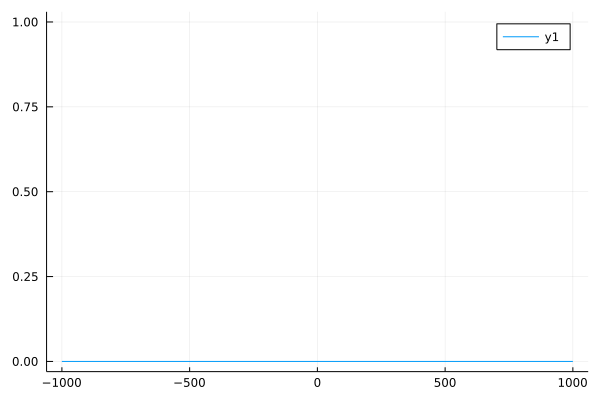

In [29]:
plot(-n:1:n,norm.(B).^2)

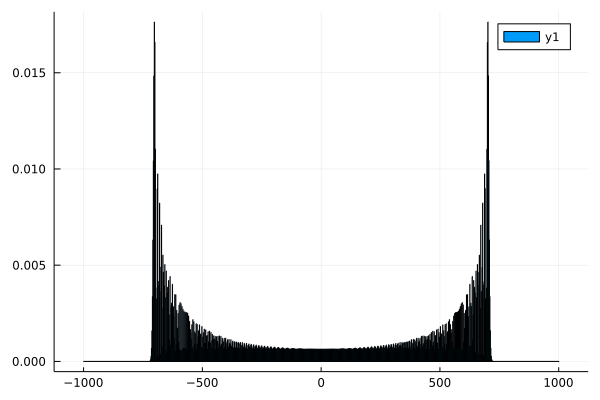

In [30]:
bar(-n:1:n,norm.(A).^2)

In [22]:
ϕ=1/sqrt(2)*[1, 1*im]

2-element Vector{ComplexF64}:
 0.7071067811865475 + 0.0im
                0.0 + 0.7071067811865475im

In [23]:
typeof(H)

Matrix{Float64} (alias for Array{Float64, 2})